In [1]:
#Import libraries for data exploration etc
#data is already cleaned
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

df = pd.read_csv("pokemon.csv")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [11]:
df['type1'].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [24]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [2]:
df['type2'] = df['type2']. fillna("none")
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,none,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,none,19.0,1,0


In [3]:
df = df.drop(df[df.is_legendary == 1].index)
df['is_legendary'].value_counts()

0    731
Name: is_legendary, dtype: int64

<AxesSubplot:xlabel='weight_kg', ylabel='height_m'>

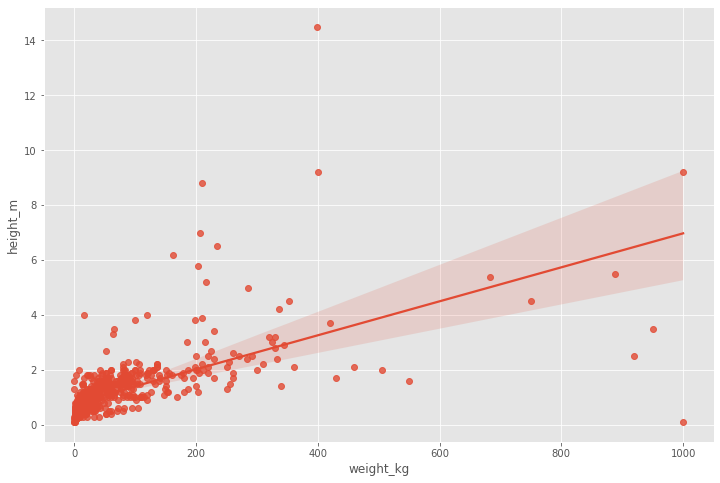

In [3]:
#weight distribtution
sns.regplot(x="weight_kg", y="height_m", data=df)

<AxesSubplot:xlabel='type1', ylabel='Count'>

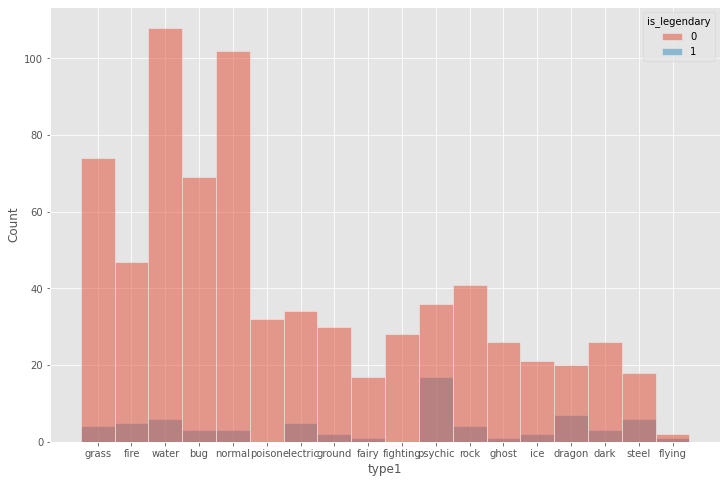

In [4]:
sns.histplot(data=df, x="type1", hue="is_legendary")

<AxesSubplot:xlabel='type2', ylabel='Count'>

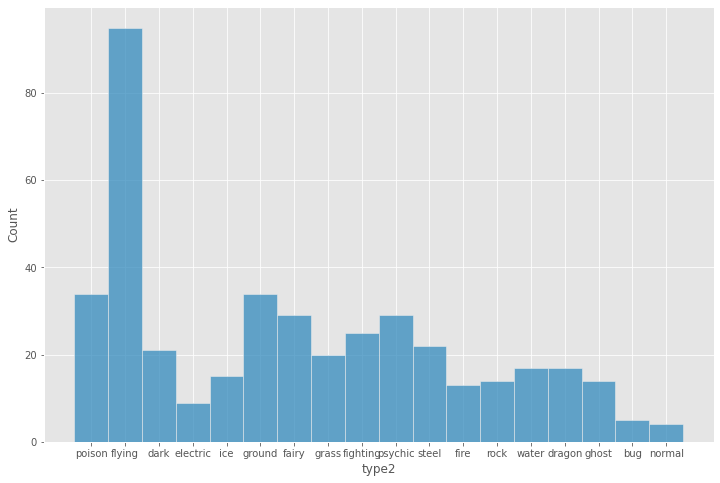

In [18]:
sns.histplot(data=df, x="type2")

In [19]:
single_type = df[df['type2'].isna()]

<AxesSubplot:xlabel='type1', ylabel='Count'>

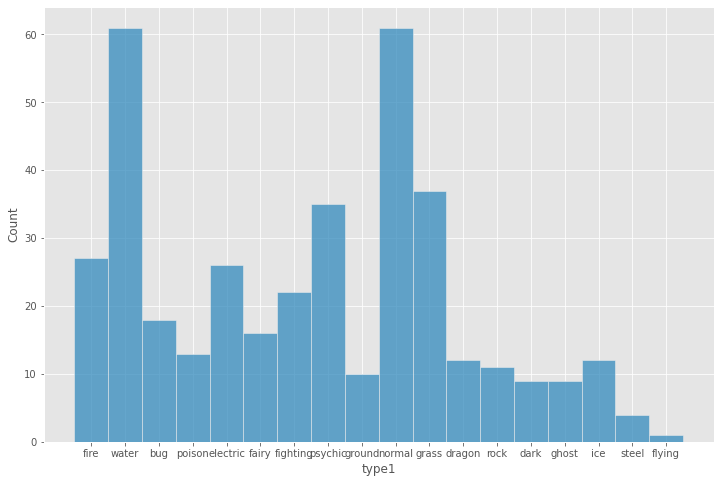

In [20]:
sns.histplot(data=single_type, x="type1")

In [27]:
types = df.filter(["type1", "type2"])

types.head()

,type1,type2
0,grass,poison
1,grass,poison
2,grass,poison
3,fire,None
4,fire,None


In [33]:
types["Count"] = 1

In [37]:
table = pd.pivot_table(types, values="Count", index='type1', columns='type2',
                          aggfunc='count')
table

type2,None,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,,
bug,18.0,NaN,NaN,NaN,4.0,2.0,1.0,2.0,13.0,1.0,6.0,1.0,NaN,NaN,11.0,NaN,3.0,4.0,3.0
dark,8.0,NaN,NaN,3.0,NaN,NaN,2.0,2.0,4.0,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,2.0,NaN
dragon,12.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
electric,24.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN
fairy,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fighting,22.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,1.0,NaN
fire,26.0,NaN,1.0,1.0,NaN,NaN,6.0,1.0,4.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN
flying,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ghost,9.0,NaN,1.0,NaN,NaN,1.0,NaN,3.0,2.0,NaN,5.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [38]:
table = table.fillna(0)
table

type2,None,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
type1,,,,,,,,,,,,,,,,,,,
bug,18.0,0.0,0.0,0.0,4.0,2.0,1.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,4.0,3.0
dark,8.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
dragon,12.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
electric,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fighting,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
fire,26.0,0.0,1.0,1.0,0.0,0.0,6.0,1.0,4.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0
flying,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ghost,9.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


In [40]:
types2 = table.reset_index()
types2.head()

type2,type1,None,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,bug,18.0,0.0,0.0,0.0,4.0,2.0,1.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,4.0,3.0
1,dark,8.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
2,dragon,12.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,electric,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
4,fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#plotting them all together creates a very big graph, so taking this in two steps
types2["Total_type2"] =(types2["bug"] + types2["dark"] + types2["dragon"] + types2["electric"] + types2["fairy"] +
    types2["fighting"] + types2["fire"] + types2["flying"] + types2["ghost"] + types2["grass"] + types2["ground"] +
    types2["ice"] + types2["normal"] + types2["poison"] + types2["psychic"] + types2["rock"] + types2["steel"] + types2["water"])
    
types2.head()

type2,type1,None,bug,dark,dragon,electric,fairy,fighting,fire,flying,...,grass,ground,ice,normal,poison,psychic,rock,steel,water,Total_type2
0,bug,18.0,0.0,0.0,0.0,4.0,2.0,1.0,2.0,13.0,...,6.0,1.0,0.0,0.0,11.0,0.0,3.0,4.0,3.0,51.0
1,dark,8.0,0.0,0.0,3.0,0.0,0.0,2.0,2.0,4.0,...,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,18.0
2,dragon,12.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
3,electric,24.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,10.0
4,fairy,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [54]:
types2_summary = types2.filter(["type1", "None", "Total_type2"])
types2_summary["Type_2"] = types2_summary["Total_type2"]
types2_summary = types2_summary.filter(["type1", "None", "Type_2"])

<AxesSubplot:xlabel='type1'>

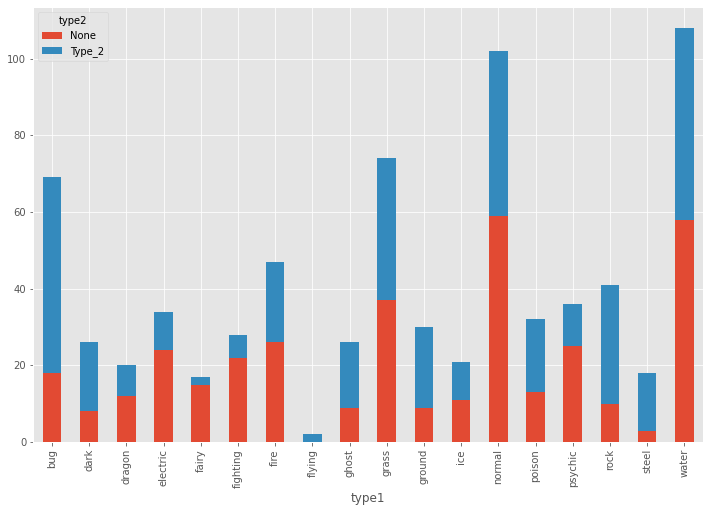

In [55]:
types2_summary.set_index('type1').plot(kind='bar', stacked=True)

In [62]:
types2_yes = types2.filter(["type1", "bug", "dark", "dragon", "electric", "fairy", "fighting", "fire", "flying", "ghost",
                            "grass", "ground", "ice", "normal", "poison", "psychic", "rock", "steel", "water"])
types2_yes.head()

type2,type1,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,bug,0.0,0.0,0.0,4.0,2.0,1.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,4.0,3.0
1,dark,0.0,0.0,3.0,0.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
2,dragon,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,electric,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
4,fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


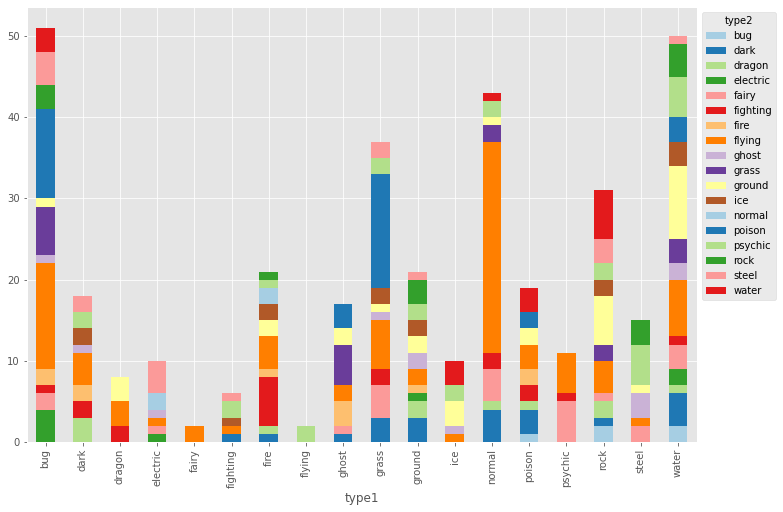

In [70]:
sns.set_palette("Paired")
fig = types2_yes.set_index('type1').plot(kind='bar', stacked=True)
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))

In [112]:
capture = df[['capture_rate','name', 'type1']]

In [113]:
capture.sort_values(by=["capture_rate"], inplace = False, ascending = False)

,capture_rate,name,type1
23,90,Arbok,poison
194,90,Quagsire,water
551,90,Krokorok,ground
163,90,Noctowl,normal
355,90,Dusclops,ghost
...,...,...,...
63,100,Kadabra,psychic
441,100,Spiritomb,ghost
751,100,Araquanid,water
577,100,Duosion,psychic


In [114]:
capture['capture_rate'] = capture['capture_rate'].apply(lambda x: float(x.split()[0].replace(',', '')))

C:\Users\slyth\AppData\Local\Temp\ipykernel_2196\3342400629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture['capture_rate'] = capture['capture_rate'].apply(lambda x: float(x.split()[0].replace(',', '')))


In [115]:
capture['capture_rate'] = capture['capture_rate'].astype(float)

C:\Users\slyth\AppData\Local\Temp\ipykernel_2196\994146933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capture['capture_rate'] = capture['capture_rate'].astype(float)


<AxesSubplot:xlabel='type1', ylabel='capture_rate'>

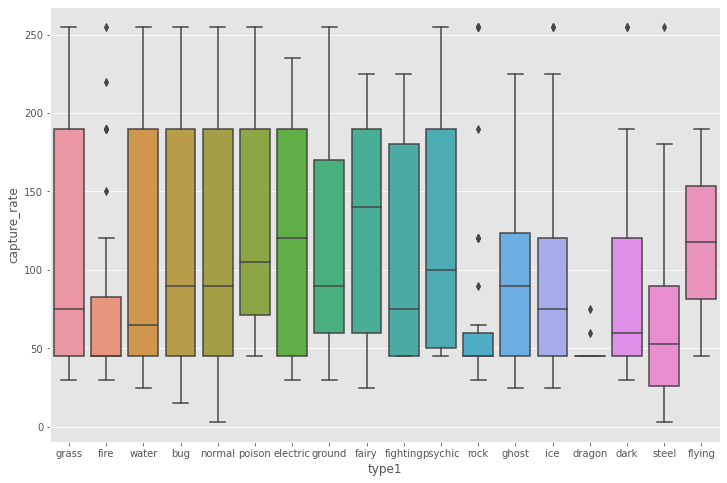

In [116]:
sns.boxplot(data=capture, x="type1", y="capture_rate")

In [119]:
#total counts of each type
type1 = df['type1'].value_counts().rename_axis('type').reset_index(name='counts')
type1

,type,counts
0,water,108
1,normal,102
2,grass,74
3,bug,69
4,fire,47
5,rock,41
6,psychic,36
7,electric,34
8,poison,32
9,ground,30


In [117]:
type2 = df['type2'].value_counts().rename_axis('type').reset_index(name='counts')
type2

,type,counts
0,none,359
1,flying,85
2,poison,33
3,ground,33
4,psychic,25
5,fairy,23
6,dark,21
7,fighting,19
8,grass,18
9,steel,18


In [120]:
types = type1.merge(type2, on='type', how='inner', suffixes=('_1', '_2'))
types

,type,counts_1,counts_2
0,water,108,16
1,normal,102,4
2,grass,74,18
3,bug,69,5
4,fire,47,11
5,rock,41,14
6,psychic,36,25
7,electric,34,8
8,poison,32,33
9,ground,30,33


In [121]:
types["Total"] = types["counts_1"] + types["counts_2"]
types

,type,counts_1,counts_2,Total
0,water,108,16,124
1,normal,102,4,106
2,grass,74,18,92
3,bug,69,5,74
4,fire,47,11,58
5,rock,41,14,55
6,psychic,36,25,61
7,electric,34,8,42
8,poison,32,33,65
9,ground,30,33,63


<AxesSubplot:xlabel='type', ylabel='Total'>

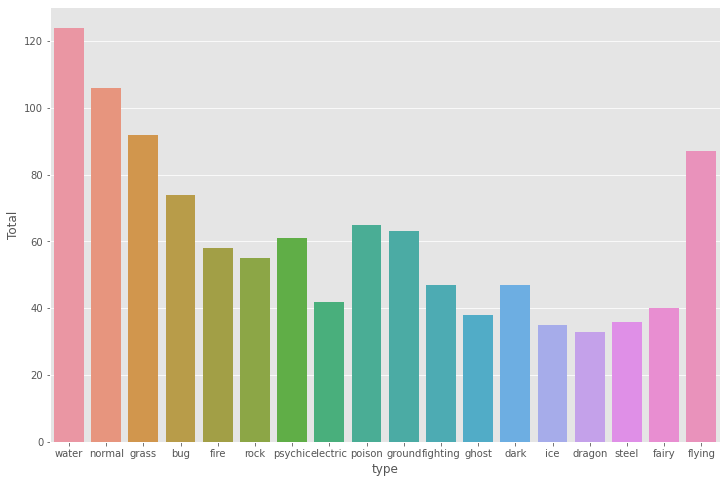

In [108]:
sns.barplot(data=types, x="type", y="Total")

In [122]:
types['Total'].median()

56.5

In [123]:
types['%'] = ((types['Total'] / types['Total'].sum())*100).round(0).astype(str) + '%'
types

,type,counts_1,counts_2,Total,%
0,water,108,16,124,11.0%
1,normal,102,4,106,10.0%
2,grass,74,18,92,8.0%
3,bug,69,5,74,7.0%
4,fire,47,11,58,5.0%
5,rock,41,14,55,5.0%
6,psychic,36,25,61,6.0%
7,electric,34,8,42,4.0%
8,poison,32,33,65,6.0%
9,ground,30,33,63,6.0%


In [77]:
#back to main df for the next bit on "strong / weak against"
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,None,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,None,19.0,1,0


In [4]:
against = df[["against_bug", "against_dark", "against_dragon", "against_electric", "against_fairy",
"against_fight", "against_fire", "against_flying", "against_ghost", "against_grass", "against_ground",
                "against_ice", "against_normal", "against_poison", "against_psychic", "against_rock", "against_steel",
              "against_water", "type1", "type2"]]

against.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1,type2
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,grass,poison
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,grass,poison
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,grass,poison
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,fire,none
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,fire,none


In [27]:
against_flying = against.loc[(against['type1']=="flying")]
against_flying
#they have the same values, so it wont matter which one I pick as example for type1

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1,type2
713,0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.25,0.0,4.0,1.0,1.0,1.0,2.0,1.0,0.5,flying,dragon
714,0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.25,0.0,4.0,1.0,1.0,1.0,2.0,1.0,0.5,flying,dragon


In [5]:
#filter for "none" type 2 for all except flying type1
against = against.loc[(against['type2']=="none") | (against['type1']=="flying")]

In [6]:
#against_values are set on type level and each type 2 exists at least once as a type 1, so removing dups from type1 will give
#one row per type with the corresponding against values

against = against.drop_duplicates(subset=['type1'])

In [7]:
against = against.drop(columns=['type2'])
against

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,fire
6,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,water
9,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,bug
22,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.50,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,poison
24,1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.00,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,electric
34,0.5,0.5,0.0,1.0,1.0,0.5,1.0,1.0,1.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,fairy
55,0.5,0.5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.00,1.0,1.0,1.0,1.0,2.0,0.5,1.0,1.0,fighting
62,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,psychic
103,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.00,1.0,2.0,1.0,0.5,1.0,0.5,1.0,2.0,ground
107,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,normal


In [8]:
#values range from 0.25 to 4
#denote the amount of damage taken against an attack of a particular type, so how much damage type1 takes against_type
#for example, fire is weak to water and takes 2 damage for type1=fire and against_type=water
#I will class everything below 1 as strong, above 1 as weak, and
# 1 as neutral. This loses some nuance, but
#for my purposes I'm mostly interested in these three broad categories, and 4 seems to be quite rare

against = against.replace([0.25, 0.5], "strong")
against = against.replace([0.0], "resistant")
against = against.replace([1.00], "neutral")
against = against.replace([2.00, 4.00], "weak")

against

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1
3,strong,neutral,neutral,neutral,strong,neutral,strong,neutral,neutral,strong,weak,strong,neutral,neutral,neutral,weak,strong,weak,fire
6,neutral,neutral,neutral,weak,neutral,neutral,strong,neutral,neutral,weak,neutral,strong,neutral,neutral,neutral,neutral,strong,strong,water
9,neutral,neutral,neutral,neutral,neutral,strong,weak,weak,neutral,strong,strong,neutral,neutral,neutral,neutral,weak,neutral,neutral,bug
22,strong,neutral,neutral,neutral,strong,strong,neutral,neutral,neutral,strong,weak,neutral,neutral,strong,weak,neutral,neutral,neutral,poison
24,neutral,neutral,neutral,strong,neutral,neutral,neutral,strong,neutral,neutral,weak,neutral,neutral,neutral,neutral,neutral,strong,neutral,electric
34,strong,strong,resistant,neutral,neutral,strong,neutral,neutral,neutral,neutral,neutral,neutral,neutral,weak,neutral,neutral,weak,neutral,fairy
55,strong,strong,neutral,neutral,weak,neutral,neutral,weak,neutral,neutral,neutral,neutral,neutral,neutral,weak,strong,neutral,neutral,fighting
62,weak,weak,neutral,neutral,neutral,strong,neutral,neutral,weak,neutral,neutral,neutral,neutral,neutral,strong,neutral,neutral,neutral,psychic
103,neutral,neutral,neutral,resistant,neutral,neutral,neutral,neutral,neutral,weak,neutral,weak,neutral,strong,neutral,strong,neutral,weak,ground
107,neutral,neutral,neutral,neutral,neutral,weak,neutral,neutral,resistant,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,normal


In [9]:
#this includes own-type attacks (eg rock against rock) and marks them as strong because you receive little damage
#to your rock Pokemon from a rock opponent. But that also means your own rock attacks against the rock opponent
#will be weak, so this is not a truely strong match. I'll change the own-type matches to "own"
against.at[3,'against_fire']="own"
against.at[6,'against_water']="own"
against.at[9,'against_bug']="own"
against.at[22,'against_poison']="own"
against.at[24,'against_electric']="own"
against.at[34,'against_fairy']="own"
against.at[55,'against_fight']="own"
against.at[62,'against_psychic']="own"
against.at[146,'against_dragon']="own"
against.at[196,'against_dark']="own"
against.at[713,'against_flying']="own"
against.at[103,'against_ground']="own"
against.at[107,'against_normal']="own"
against.at[113,'against_grass']="own"
against.at[184,'against_rock']="own"
against.at[199,'against_ghost']="own"
against.at[360,'against_ice']="own"
against.at[598,'against_steel']="own"

In [10]:
#fix the flying ratings that are influenced by "type 2 = dragon", using this chart https://pokemondb.net/type

against.at[713,'against_fire']="neutral"
against.at[713,'against_normal']="neutral"
against.at[713,'against_water']="neutral"
against.at[713,'against_electric']="weak"
against.at[713,'against_grass']="strong"
against.at[713,'against_ice']="weak"
against.at[713,'against_fight']="strong"
against.at[713,'against_ground']="resistant"
against.at[713,'against_poison']="neutral"
against.at[713,'against_psychic']="neutral"
against.at[713,'against_bug']="strong"
against.at[713,'against_rock']="weak"
against.at[713,'against_ghost']="neutral"
against.at[713,'against_dragon']="neutral"
against.at[713,'against_dark']="neutral"
against.at[713,'against_steel']="neutral"
against.at[713,'against_fairy']="neutral"

In [11]:
against.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,type1
3,strong,neutral,neutral,neutral,strong,neutral,own,neutral,neutral,strong,weak,strong,neutral,neutral,neutral,weak,strong,weak,fire
6,neutral,neutral,neutral,weak,neutral,neutral,strong,neutral,neutral,weak,neutral,strong,neutral,neutral,neutral,neutral,strong,own,water
9,own,neutral,neutral,neutral,neutral,strong,weak,weak,neutral,strong,strong,neutral,neutral,neutral,neutral,weak,neutral,neutral,bug
22,strong,neutral,neutral,neutral,strong,strong,neutral,neutral,neutral,strong,weak,neutral,neutral,own,weak,neutral,neutral,neutral,poison
24,neutral,neutral,neutral,own,neutral,neutral,neutral,strong,neutral,neutral,weak,neutral,neutral,neutral,neutral,neutral,strong,neutral,electric


In [12]:
against_new = pd.melt(against, 
            id_vars='type1', 
            value_vars=list(against.columns[0:18]), # list of columns
            var_name='Against', 
            value_name='Strength')

In [13]:
against_new.head()

,type1,Against,Strength
0,fire,against_bug,strong
1,water,against_bug,neutral
2,bug,against_bug,own
3,poison,against_bug,strong
4,electric,against_bug,neutral


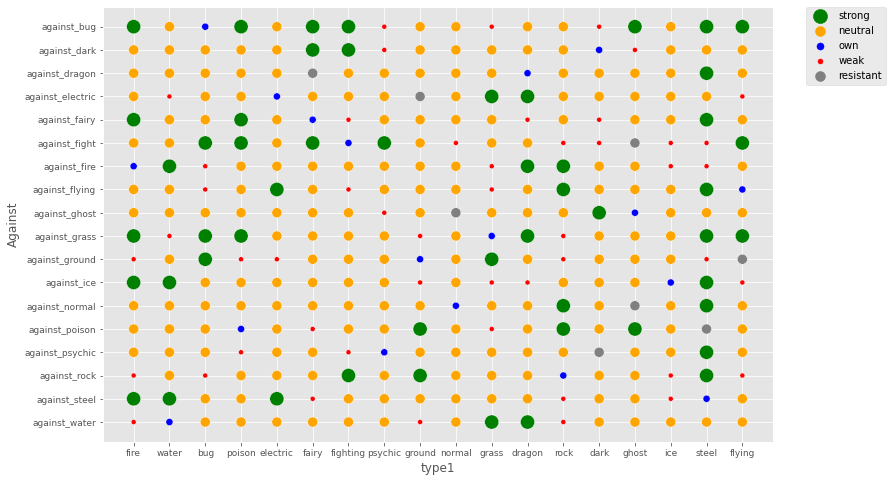

In [14]:
sns.scatterplot(data=against_new, x="type1", y="Against", hue="Strength", palette=['green','orange','blue', 'red', 'grey'],
                size ="Strength", sizes=[200, 100, 50, 25, 100])
plt.tick_params(axis='both', which='major', labelsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [125]:
name = df[["name", "type1", "type2"]]
name.head()

,name,type1,type2
0,Bulbasaur,grass,poison
1,Ivysaur,grass,poison
2,Venusaur,grass,poison
3,Charmander,fire,none
4,Charmeleon,fire,none


In [38]:
against_new.to_csv('against_types.csv')
types.to_csv('capture_rate.csv')
name.to_csv('names.csv')